In [1]:
# https://medium.com/@airwaves/learn-linear-regression-with-tensorflow-f9c2fcc76214

import numpy as np
import pandas as pd
import random
import tensorflow as tf

from matplotlib import pyplot as plt

In [2]:
# 讀取資料
data = pd.read_csv('Downloads/Salary_Data.csv')

# 讀取 features，並標準化
features = data.iloc[:, 0]
max_features, min_features = max(features), min(features)
features = (features-min_features)/(max_features-min_features)

# 讀取 labels，並標準化
labels = data.iloc[:, 1]
max_labels, min_labels = max(labels), min(labels)
labels = (labels-min_labels)/(max_labels-min_labels)

In [9]:
# 定義超參數
batch_size = 10
learning_rate = 0.03
epochs = 100
num_inputs = 1
num_examples = len(features)

In [10]:
# 定義模型
x = tf.placeholder(shape=(None, num_inputs), dtype=tf.float32)
y = tf.placeholder(shape=(None, 1), dtype=tf.float32)

w = tf.Variable([[0.1]], dtype=tf.float32)
b = tf.Variable(np.zeros(shape=(1,)), dtype=tf.float32)
y_hat = tf.add(tf.matmul(x, w), b)

In [11]:
loss = tf.reduce_mean(tf.reduce_sum(tf.pow(y-y_hat, 2)))

In [12]:
grad_w, grad_b = tf.gradients(loss, [w, b])
new_w = tf.assign(w, w - learning_rate * grad_w)
new_b = tf.assign(b, b - learning_rate * grad_b)

In [13]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = np.array(indices[i: min(i + batch_size, num_examples)])
        yield features.take(j, axis=0), labels.take(j, axis=0)

In [14]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(1, epochs+1):
        for xs, ys, in data_iter(batch_size, features, labels):
            xs = xs.reshape(-1, 1)
            ys = ys.reshape(-1, 1)
            _, _, l = sess.run([new_w, new_b, loss], feed_dict={
                x: xs, 
                y: ys})
        if epoch % 10 == 0:
            print('Epoch {}: , loss: {}'.format(epoch, l))
    true_w, true_b = sess.run([w, b])

AttributeError: 'Series' object has no attribute 'reshape'

In [15]:
pred_salary = features.values * true_w + true_b
pred_salary = pred_salary.reshape((-1, 1))
pred_salary = pred_salary * (max_labels-min_labels) + min_labels

NameError: name 'true_w' is not defined

In [16]:
features = features * (max_features-min_features) + min_features
labels = labels * (max_labels-min_labels) + min_labels

NameError: name 'pred_salary' is not defined

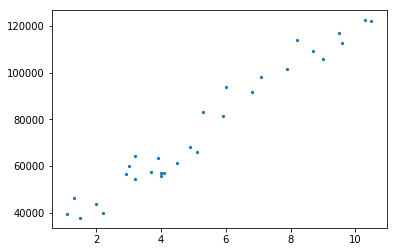

In [17]:
plt.scatter(features, labels, 5)
plt.plot(features, pred_salary, color='r')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()